In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

In [276]:
plt.style.use('ggplot')

In [277]:
%run NeuralNet.py

In [278]:
iris = pd.read_csv('iris.csv')

iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


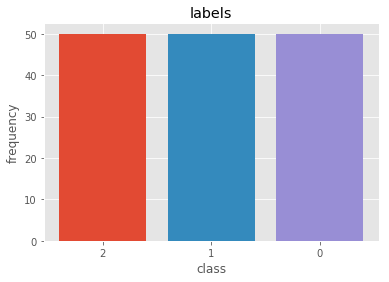

In [279]:
for value, count in iris['class'].value_counts().iteritems():
    plt.bar(str(value), count)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('labels')
plt.show()

In [280]:
iris.describe()

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [281]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [282]:
x = iris.drop("class", axis=1)
for c in x:
    scaler = MinMaxScaler(feature_range=(0,1))
    x[c] = scaler.fit_transform(x[[c]])
    
preprocessed_x = x.values
preprocessed_y = pd.get_dummies(iris['class']).values

In [283]:
train_x, test_x, train_y, test_y = train_test_split(preprocessed_x, preprocessed_y, test_size=0.2)

In [284]:
display(f"train records = {len(train_x)}")
display(f"test records = {len(test_x)}")

'train records = 120'

'test records = 30'

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 20.97it/s]


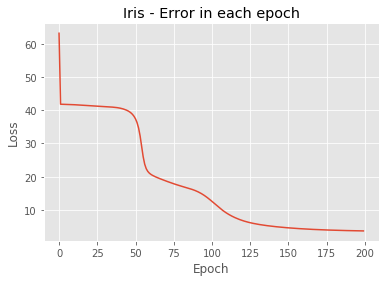

In [285]:
nn = NeuralNetworkBuilder.build(4, [8, 8, 3], Sigmoid())

loss = []
for _ in tqdm(range(200)):
    loss.append(nn.train(train_x, train_y, 0.3))
    
plt.plot(loss)
plt.title("Iris - Error in each epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [286]:
predicted = np.round(nn.predict(train_x))

ok = 0
for pred, exp in zip(predicted, train_y):
    if (pred == exp).all():
        ok += 1

print(f"Train score = {ok}/{len(predicted)} ({ok/len(predicted) * 100:2.1f}%)")

Train score = 114/120 (95.0%)


In [287]:
predicted = np.round(nn.predict(test_x))

ok = 0
for pred, exp in zip(predicted, test_y):
    if (pred == exp).all():
        ok += 1

print(f"Test score = {ok}/{len(predicted)} ({ok/len(predicted) * 100:2.1f}%)")

Test score = 30/30 (100.0%)
